## 데이터 정제
- 현장에서 만드렁진 데이터는 오류를 포함하고 있기 때문에 분석하기 전에 수정이 필요
1. 결측치(빠진 데이터)
2. 이상치(이상한 데이터)

## 7-1 결측치(빠진 데이터 찾아 정제)

## Lab 1 : 결측치 찾기
- 결측치 만들기
- 결측치 확인하기

In [43]:
import numpy as np
import pandas as pd

In [44]:
# 결측치가 들어있는 데이터 프레임 만들기
# NaN : Not a Number 숫자 형태의 누락된 데이터
df = pd.DataFrame({'sex': ['M', 'F', np.nan, 'M', 'F'],
                  'score' : [5, 4, 3, 4, np.nan]})
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [45]:
# NaN 값으로 연산된 결과 값도 NaN
df['score'] + 1

0    6.0
1    5.0
2    4.0
3    5.0
4    NaN
Name: score, dtype: float64

In [46]:
# 결측치 확인하기
# na : Not Available
pd.isna(df)

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [47]:
# 결측치 개수
pd.isna(df).sum()

sex      1
score    1
dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sex     4 non-null      object 
 1   score   4 non-null      float64
dtypes: float64(1), object(1)
memory usage: 208.0+ bytes


In [6]:
# 컬럼(변수) score의 결측치 개수
pd.isna(df)['score'].sum()

1

## Lab 2 : 결측치 제거
- 결측치 있는 행 제거하기
- 여러 변수(컬럼)에 결측치 없는 데이터 추출하기
- 결측치가 하나라도 있으면 제거하기

In [7]:
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [8]:
# score 변수에서 결측치가 있는 행을 제거
df.dropna(subset=['score'])

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [9]:
# 앞의 연산 결과가 df에는 반영되지 않았음을 확인
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [10]:
df_nomiss = df.dropna(subset=['score'])
df_nomiss

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [11]:
df_nomiss['score'] + 1

0    6.0
1    5.0
2    4.0
3    5.0
Name: score, dtype: float64

In [12]:
# 변수 sex, score의 결측치 제거하기
df_nomiss = df.dropna(subset = ['sex', 'score'])
df_nomiss

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [13]:
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [14]:
# 결측치가 하나라도 있으면 모두 제거하기
df_nomiss2 = df.dropna()
df_nomiss2

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


## 생각해보기 - 결측치를 모두 제거해 버리면??
1. 분석에 필요한 행까지 모두 제거될 수 있음
2. 예를 들어, (성별, 소득, 지역) 세 변수로 구성된 데이터에서 '성별에 따른 소득 격차'를 알아보는 경우, 지역의 결측치를 제거할 필요가 없음

## Lab 3 : 결측치 제거하기
1. 평균 값으로 대체하기
- exam.csv 파일 불러오기
- exam 데이터에서 math의 일부 데이터를 결측치(np.nan)로 대체하기
- exam의 결측치를 math의 평균 값을 구항 평균값으로 대체하기

In [20]:
exam = pd.read_csv('exam.csv')

In [21]:
# 인덱스 값 2, 7, 14에 해당하는 해의 math 컬럼 값을 NaN 값으로 변경
exam.loc[[2, 7, 14], ['math']] = np.nan
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,NaN,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,NaN,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [22]:
# math 평균값 구하기
exam['math'].mean()

55.23529411764706

In [23]:
# 결측치 값을 평균값 대체하기
exam['math'] = exam['math'].fillna(55)

In [24]:
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,55.0,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,55.0,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [25]:
# 결측치 확인
exam['math'].isna().sum()

0

## Lab 4 : 혼자서 해보기 (mpg 데이터 분석)
- mpg 데이터에 결측치를 만들고, 데이터를 분석해보기
- 인덱스 값 [64, 123, 130, 152, 211]의 고속도로 연비(hwy) 값을 결측치로 만들기

In [26]:
mpg = pd.read_csv('mpg.csv')

In [27]:
# 인덱스 값 [64, 123, 130, 152, 211]의 고속도로 연비(hwy) 값을 결측치로 만들기
mpg.loc[[64,123,130,152,211], 'hwy'] = np.nan

In [28]:
# 인덱스 값 [64, 65]의 데이터를 출력해서 NaN 값 확인
mpg.iloc[64:66]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
64,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,12,NaN,r,pickup
65,dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,9,12.0,e,pickup


> Q1 : 구동 방식(drv) 별로 고속도로 연비(hwy) 평균일 비교하려고 함
> - drv와 hwy 변수에 결측치가 몇개 있는지 확인하기

In [31]:
# 변수 drv, hwy 값에 결측치가 몇개인지 확인
mpg[['drv', 'hwy']].isna().sum()

drv    0
hwy    5
dtype: int64

> Q2 : df.dropna()를 이용하여 hwy 변수의 결측치를 제거하고, 어떤 구동 방식의 hwy 평균 연비가 높은지 알아보시오. 하나의 pandas 구문으로 작성해 보시오

In [32]:
# 변수 hwy 값에 결측치가 몇개인지 확인
mpg.dropna(subset = ['hwy']).isna().sum()

manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             0
hwy             0
fl              0
category        0
dtype: int64

In [49]:
# 변수 hwy 변수 값에 결측치를 제거하고 어떤 구동 방식(drv)의 hwy 평균 연비가 높은지

mpg.dropna(subset=['hwy']).groupby('drv').agg(mean_hwy = ('hwy','mean' ))

,mean_hwy
drv,
4,19.242424
f,28.200000
r,21.000000


## Lab 5 : 이상치 정제하기 (이상한 데이터 찾아 정제)
- 이상치 : 정상 범위에서 크게 벗어난 값
- (예)몸무게 230kg

- 이상 값을 제거하고 성별 score 평균 구하기
1. 이상치를 갖는 데이터 만들기
2. 이상치 확인하기
3. 결측 처리하기
4. 성별 score 평균 구하기

In [50]:
# 이상치를 갖는 데이터 만들기
# sex (남자 -1, 여자 -2)
# score (1점 ~ 5점) 5점 척도로 분류
# 이상치 : sex -3, score -6
df = pd.DataFrame({'sex':[1,2,1,3,2,1],
                  'score':[5,4,3,4,2,6]})
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [52]:
# 이상치 확인하기
# sex 값의 집단별 빈도수 확인 -3값이 존재
df['sex'].value_counts().sort_index()

1    3
2    2
3    1
Name: sex, dtype: int64

In [53]:
# 이상치 확인하기
# score 값의 집단별 빈도수 확인 - 6값이 존재
df['score'].value_counts().sort_index()

2    1
3    1
4    2
5    1
6    1
Name: score, dtype: int64

In [54]:
# 이상 값을 찾아 결측치 부여
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])
df

,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [55]:
# 이상 값을 찾아 결측치 부여
df['score'] = np.where(df['score'] > 5, np.nan, df['score'])
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [56]:
df.dropna(subset = ['sex', 'score'])\
    .groupby('sex')\
    .agg(mean_score = ('score', 'mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


## Lab 6 : 이상치 제거하기 - 극단적인 값
- 값의 정상범위를 정하고, 정상범위를 벗어난 값을 제거하기
- 값의 정상 범위를 정할 때 통계적 기준을 적용할 수 있음
1. 상자(수염) 그림으로 극단치 기준 정하기

### 1. 상자 그림 살펴보기

In [57]:
mpg = pd.read_csv('mpg.csv')

In [58]:
import seaborn as sns

<AxesSubplot:ylabel='hwy'>

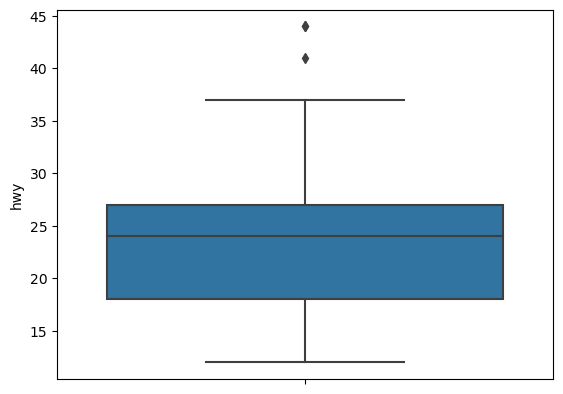

In [59]:
sns.boxplot(data = mpg, y = 'hwy')

### 2. 극단치 기준값 구하기
> 1사분위수, 3사분위수 구하기

In [60]:
pct25 = mpg['hwy'].quantile(.25)
pct25

18.0

In [61]:
pct75 = mpg['hwy'].quantile(.75)
pct75

27.0

> IQR 구하기

In [63]:
iqr = pct75 - pct25
iqr

9.0

> 하한, 상한 구하기

In [64]:
pct25 - 1.5 * iqr

4.5

In [65]:
pct75 + 15 * iqr

162.0

### 3. 극단치를 결측 처리하기
- hwy 값이 4.5 ~ 40.5를 벗어나면 결측치 처리
- (pct25 - 1.5 iqr) ~ (pct75 + 1.5 iqr)

In [67]:
# 극단치를 결측 처리함
# 주의 : np.where()의 각 조건을 괄호로 감까주어야 함
mpg['hwy'] = np.where((mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5),
                      np.nan, mpg['hwy'])

In [68]:
# 결측 처리된 값의 수 확인
mpg['hwy'].isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
229    False
230    False
231    False
232    False
233    False
Name: hwy, Length: 234, dtype: bool>

### 4. 결측치를 제외하고 데이터 분석
- 구동방식(drv)에 따라 고속도로 연비(hwy)가 어떻게 달라지는지 확인

In [69]:
mpg.dropna(subset=['hwy'])\
    .groupby('drv')\
    .agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.174757
f,27.728155
r,21.000000


## Lab 7 : 혼자서 해보기
1. mpg 데이터에서 구동방식(drv)별 도시 연비(cty)를 분석해 봅시다.
2. mpg 데이터에 이상값과 극단값을 할당합니다.

- (drv 이상치 할당) mpg.loc[[9,13,57,92], 'drv'] = 'k'
- (cty 이상치 할당) mpg.loc[[28,42,128,202],'cty']=[3,4,39,42]

> mpg 데이터에 이상치 할당

In [70]:
mpg = pd.read_csv('mpg.csv')

In [71]:
# drv에는 4(사륜), f(전륜), r(후륜)의 값만 존재함
# k는 허용하지 않는 이상치
# [9, 13, 57, 92]행의 drv 값을 k로 할당
mpg.loc[[9,13,57,92], 'drv'] = 'k'

In [72]:
# [28, 42, 128, 202]행의 도시 연비 값을 각각 [3, 4, 39, 42]로 할당
# 도시 연비 값 [3, 4, 39, 42]은 (pct25 - 1.5 * iqr) ~ (pct75 + 1.5 * iqr) 범위 밖의
mpg.loc[[28,42,128,202], 'cty'] = [3,4,39,42]

Q1 : drv에 이상치가 있는지 확인

In [73]:
# k 값이 4개 존재하는 것을 확인
mpg['drv'].value_counts()

f    106
4    100
r     24
k      4
Name: drv, dtype: int64

In [77]:
# drv 이상 값 k에 대해 NaN 처리
mpg['drv'] = np.where(mpg['drv'].isin(['4', 'f', 'r']), mpg['drv'], np.nan)

In [78]:
# drv 변수에 이상값(NaN)이 몇개인지 확인
mpg['drv'].isna().sum()

4

In [79]:
# drv에 따른 자동차 빈도 수 구하기
mpg['drv'].value_counts()

f    106
4    100
r     24
Name: drv, dtype: int64

> Q2 : 상자 그림으로 cty에 이상치가 있는지 확인
> - (pct25 - 1.5 iqr) ~ (pct75 + 1.5 iqr) 범위 밖에 극단 값이 있는지 확인


<AxesSubplot:ylabel='cty'>

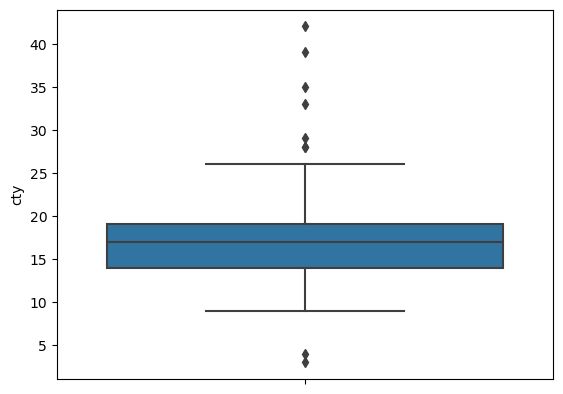

In [81]:
# 도시연비 cty에 이상치가 있는지 확인하기 위해 박스 수염 그래프 그리기
# (pct25 - 1.5 * iqr) ~ (pct75 + 1.5 * iqr) 범위 밖에 극단 값이 있음을 확인
sns.boxplot(data=mpg, y = 'cty')

In [82]:
# 25% 값 구하기
pct25 = mpg['cty'].quantile(0.25)
pct25

14.0

In [83]:
# 75% 값 구하기
ptc75 = mpg['cty'].quantile(0.75)
pct75

27.0

In [84]:
# iqr 값 구하기
iqr = pct75 - pct25
iqr

13.0

In [85]:
pct25 - 1.5 * iqr

-5.5

In [86]:
pct75 + 1.5 * iqr

46.5

In [87]:
# (pct25 - 1.5 * iqr) ~ (pct75 + 1.5 * iqr) 범위 밖에 극단 값인 경우 NaN 처리
mpg['cty'] = np.where((mpg['cty'] < 6.5) | (mpg['cty'] > 26.5),
                     np.nan, mpg['cty'])

<AxesSubplot:ylabel='cty'>

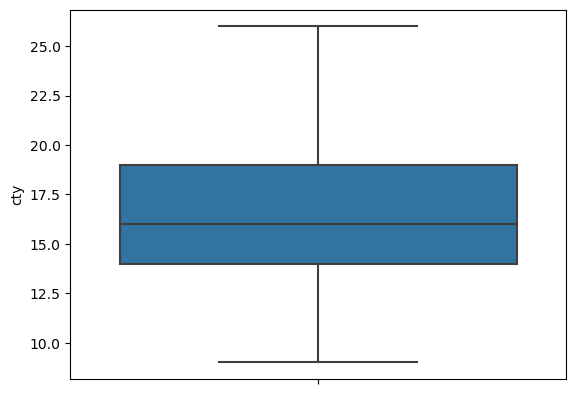

In [88]:
# 도시연비 cty에 대해 박스 수염 그래프 그리기
sns.boxplot(data=mpg, y='cty')

> Q3 : 구동방식(drv)별로 도시연비(cty) 평균이 어떻게 다른지 확인하기

In [90]:
# 구동방식(drv)과 도시연비(cty)의 이상 값을 제거하고
# 구동방식(drv)별로 도시연비(cty) 평균이 어떻게 다른지 확인하기

mpg.dropna(subset = ['drv', 'cty'])\
    .groupby('drv')\
    .agg(mean_cty=('cty', 'mean'))

,mean_cty
drv,
4,14.247423
f,19.470000
r,13.958333


In [93]:
temp = pd.read_csv('temp_seoul_no.csv', encoding='cp949')

In [94]:
# 데이터 형태 확인하기
temp.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,\t1907-10-01,108.0,13.5,7.9,20.7
1,\t1907-10-02,108.0,16.2,7.9,22.0
2,\t1907-10-03,108.0,16.2,13.1,21.3
3,\t1907-10-04,108.0,16.5,11.2,22.0
4,\t1907-10-05,108.0,17.6,10.9,25.4


In [96]:
# 데이터 프레임의 각 변수의 타입과 non-Null 데이터 개수 확인
# 전체 데이터 41765개
# 평균기온(℃)의 경우, 일부 데이터가 결측치임을 확인
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41767 entries, 0 to 41766
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       41767 non-null  object 
 1   지점       41766 non-null  float64
 2   평균기온(℃)  41009 non-null  float64
 3   최저기온(℃)  41006 non-null  float64
 4   최고기온(℃)  41006 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.6+ MB


In [97]:
# 변수(컬럼)의 이름 확인(변수 이름이 한글명)
temp.columns

Index(['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)'], dtype='object')

In [99]:
# 3번째 변수 이름 출력
temp.columns[2]

'평균기온(℃)'

In [100]:
# 3번째 변수 값이 NULL인 값의 개수 출력
temp[temp.columns[2]].isna().sum()

758

In [101]:
temp_new = temp.copy()

In [102]:
temp_new.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,\t1907-10-01,108.0,13.5,7.9,20.7
1,\t1907-10-02,108.0,16.2,7.9,22.0
2,\t1907-10-03,108.0,16.2,13.1,21.3
3,\t1907-10-04,108.0,16.5,11.2,22.0
4,\t1907-10-05,108.0,17.6,10.9,25.4


In [103]:
# 변수 이름 '평균기온(℃)'를 'temp_mean'으로 변경
temp_new = temp_new.rename(columns = {temp_new.columns[2]: 'temp_mean'})

In [104]:
# 변수 이름 변경 확인
temp_new.head()

,날짜,지점,temp_mean,최저기온(℃),최고기온(℃)
0,\t1907-10-01,108.0,13.5,7.9,20.7
1,\t1907-10-02,108.0,16.2,7.9,22.0
2,\t1907-10-03,108.0,16.2,13.1,21.3
3,\t1907-10-04,108.0,16.5,11.2,22.0
4,\t1907-10-05,108.0,17.6,10.9,25.4


In [105]:
# 변수 이름 '최저기온(℃)'를 'temp_min'으로 변경
temp_new = temp_new.rename(columns = {temp_new.columns[3]: 'temp_min'})

In [106]:
# 변수 이름 '최저기온(℃)'를 'temp_max'으로 변경
temp_new = temp_new.rename(columns = {temp_new.columns[4]: 'temp_max'})

In [107]:
temp_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41767 entries, 0 to 41766
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   날짜         41767 non-null  object 
 1   지점         41766 non-null  float64
 2   temp_mean  41009 non-null  float64
 3   temp_min   41006 non-null  float64
 4   temp_max   41006 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.6+ MB


In [108]:
# 서울 지역 역대 최고 기온 확인하기
temp_new[['temp_max']].max()

temp_max    39.6
dtype: float64

In [109]:
# 서울 지역 역대 최고 기온인 날짜 확인하기
temp_new.query('temp_max == 39.6')

,날짜,지점,temp_mean,temp_min,temp_max
40051,\t2018-08-01,108.0,33.6,27.8,39.6


In [110]:
# 날짜 변수 값이 '\t'으로 시작하는 것을 확인
# 날짜 변수 값에서 '\t'를 삭제함
# (주의) '' 공백이 없음
temp_new['날짜'] = temp_new['날짜'].str.replace('\t', '')

In [111]:
# 날짜 변수 값에서 '\t'가 삭제된 것을 확인
temp_new.head()

,날짜,지점,temp_mean,temp_min,temp_max
0,1907-10-01,108.0,13.5,7.9,20.7
1,1907-10-02,108.0,16.2,7.9,22.0
2,1907-10-03,108.0,16.2,13.1,21.3
3,1907-10-04,108.0,16.5,11.2,22.0
4,1907-10-05,108.0,17.6,10.9,25.4


In [112]:
# 변수 '날짜'의 데이터 타입이 object 인것을 확인
temp_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41767 entries, 0 to 41766
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   날짜         41767 non-null  object 
 1   지점         41766 non-null  float64
 2   temp_mean  41009 non-null  float64
 3   temp_min   41006 non-null  float64
 4   temp_max   41006 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.6+ MB


In [114]:
# 변수 '날짜'의 데이터 타입을 datetime을 변경
# 변수 '날짜'의 각각의 값에 대해 (apply(lambda x))
# 날짜 값을 datetime 유형으로 변환 (pd.to_datetime(str(x), format='%Y-%m-%d'))
temp_new['날짜'] = temp_new['날짜'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d') )

In [115]:
# 변수 '날짜'의 데이터 타입이 datetime으로 변경된 것을 확인
temp_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41767 entries, 0 to 41766
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   날짜         41766 non-null  datetime64[ns]
 1   지점         41766 non-null  float64       
 2   temp_mean  41009 non-null  float64       
 3   temp_min   41006 non-null  float64       
 4   temp_max   41006 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 1.6 MB


In [116]:
temp_new.head()

,날짜,지점,temp_mean,temp_min,temp_max
0,1907-10-01,108.0,13.5,7.9,20.7
1,1907-10-02,108.0,16.2,7.9,22.0
2,1907-10-03,108.0,16.2,13.1,21.3
3,1907-10-04,108.0,16.5,11.2,22.0
4,1907-10-05,108.0,17.6,10.9,25.4


## 일교차(일별 온도차) 구하기
1. 일교차를 구하여 파생변수 diff로 생성

In [117]:
# 일교차를 구하여 파생변수 diff로 생성
temp_new['diff'] = temp_new['temp_max'] - temp_new['temp_min']

In [118]:
# 일교차 파생변수 diff 값 확인
temp_new.head()

,날짜,지점,temp_mean,temp_min,temp_max,diff
0,1907-10-01,108.0,13.5,7.9,20.7,12.8
1,1907-10-02,108.0,16.2,7.9,22.0,14.1
2,1907-10-03,108.0,16.2,13.1,21.3,8.2
3,1907-10-04,108.0,16.5,11.2,22.0,10.8
4,1907-10-05,108.0,17.6,10.9,25.4,14.5


> Q1 : 역대 일교차가 가장 컸던 날의 일교차는?

In [119]:
# 일교차 파생변수 diff 값 확인
temp_new.sort_values('diff', ascending=False).head(10)

,날짜,지점,temp_mean,temp_min,temp_max,diff
12619,1942-04-19,108.0,12.7,2.5,24.3,21.8
3863,1918-04-29,108.0,16.7,4.6,26.3,21.7
3147,1916-05-13,108.0,18.1,8.3,29.7,21.4
13980,1946-01-09,108.0,-8.1,-13.6,7.7,21.3
6026,1924-03-31,108.0,9.0,-1.0,20.2,21.2
7696,1928-10-26,108.0,14.3,4.5,25.7,21.2
559,1909-04-12,108.0,11.1,-0.9,20.2,21.1
3545,1917-06-15,108.0,23.8,13.5,34.5,21.0
2062,1913-05-24,108.0,19.7,9.2,30.0,20.8
11513,1939-04-09,108.0,10.6,0.6,21.4,20.8


## 날짜를 년(year), 월(month), 일(day)로 나누기
1. 날짜를 년(year), 월(month), 일(day)로 나누어 파생 변수로 만들어 저장

In [121]:
# 날짜에서 년(year)을 구하여 파생 변수 year로 만들어 저장
temp_new['year'] = temp_new['날짜'].dt.year

In [122]:
temp_new.head()

,날짜,지점,temp_mean,temp_min,temp_max,diff,year
0,1907-10-01,108.0,13.5,7.9,20.7,12.8,1907.0
1,1907-10-02,108.0,16.2,7.9,22.0,14.1,1907.0
2,1907-10-03,108.0,16.2,13.1,21.3,8.2,1907.0
3,1907-10-04,108.0,16.5,11.2,22.0,10.8,1907.0
4,1907-10-05,108.0,17.6,10.9,25.4,14.5,1907.0


In [123]:
# 날짜에서 월(month)을 구하여 파생 변수 month로 만들어 저장
temp_new['month'] = temp_new['날짜'].dt.month

In [124]:
# 날짜에서 일(day)을 구하여 파생 변수 day로 만들어 저장
temp_new['day'] = temp_new['날짜'].dt.day

In [125]:
temp_new.head()

,날짜,지점,temp_mean,temp_min,temp_max,diff,year,month,day
0,1907-10-01,108.0,13.5,7.9,20.7,12.8,1907.0,10.0,1.0
1,1907-10-02,108.0,16.2,7.9,22.0,14.1,1907.0,10.0,2.0
2,1907-10-03,108.0,16.2,13.1,21.3,8.2,1907.0,10.0,3.0
3,1907-10-04,108.0,16.5,11.2,22.0,10.8,1907.0,10.0,4.0
4,1907-10-05,108.0,17.6,10.9,25.4,14.5,1907.0,10.0,5.0


In [126]:
# 데이터 프레임 temp_new에서 결측치 개수 확인
pd.isna(temp_new).sum()

날짜             1
지점             1
temp_mean    758
temp_min     761
temp_max     761
diff         762
year           1
month          1
day            1
dtype: int64

In [127]:
# 데이터 프레임 temp_new에서 변수 'temp_mean', 'temp_min', 'temp_max' 결측치 제거
temp_new = temp_new.dropna(subset=['temp_mean', 'temp_min', 'temp_max'])

In [128]:
pd.isna(temp_new).sum()

날짜           0
지점           0
temp_mean    0
temp_min     0
temp_max     0
diff         0
year         0
month        0
day          0
dtype: int64

> Q:월별 평균 일교차가 큰 달을 알아보기

In [129]:
# 월별 평균 일교차가 큰 달을 알아보기
temp_new.groupby('month')\
    .agg(diff_mean = ('diff', 'mean'))\
    .sort_values('diff_mean', ascending=False)

,diff_mean
month,
10.0,10.866916
5.0,10.844700
4.0,10.817507
6.0,9.722262
3.0,9.609164
9.0,9.464925
11.0,9.405089
2.0,8.874397
1.0,8.436826


> Q:월별 평균 기온 알아보기

In [130]:
temp_new.groupby('month')\
    .agg(mean_temp = ('temp_mean', 'mean'))

,mean_temp
month,
1.0,-3.534057
2.0,-0.902883
3.0,4.559349
4.0,11.473175
5.0,17.012298
6.0,21.538988
7.0,24.809706
8.0,25.554249
9.0,20.641441


> Q: 역대 1월 평균 기온 변화를 알아보자

In [131]:
# 1월 기온만 추출하기
temp_jan = temp_new.query('month == 1.0')
temp_jan.head()

,날짜,지점,temp_mean,temp_min,temp_max,diff,year,month,day
92,1908-01-01,108.0,-5.9,-9.1,-1.3,7.8,1908.0,1.0,1.0
93,1908-01-02,108.0,-7.7,-13.9,-3.0,10.9,1908.0,1.0,2.0
94,1908-01-03,108.0,-6.2,-10.8,-2.9,7.9,1908.0,1.0,3.0
95,1908-01-04,108.0,-7.5,-12.8,-1.7,11.1,1908.0,1.0,4.0
96,1908-01-05,108.0,-4.8,-11.3,-0.1,11.2,1908.0,1.0,5.0


In [132]:
# 년도별 1월 평균 기온 출력하기
mean_temp_jan = temp_jan.groupby('year')\
    .agg(mean_temp_jan = ('temp_mean', 'mean'))
mean_temp_jan.head()

,mean_temp_jan
year,
1908.0,-3.464516
1909.0,-2.509677
1910.0,-2.258065
1911.0,-4.961290
1912.0,-4.687097


<AxesSubplot:xlabel='year'>

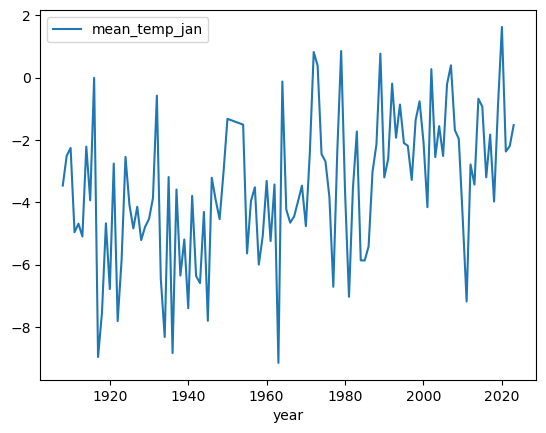

In [133]:
# 년도별 1월 평균 기온은 라인 그래프로 출력하기
mean_temp_jan.plot.line()